# Network Intrusion Detection System (NIDS) using Machine Learning (ML)



 Network Intrusion Detection System (NIDS) using Machine Learning techniques with the [NSL-KDD](https://www.kaggle.com/datasets/hassan06/nslkdd) dataset

- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Naive Bayes
- Logistic Regression

ML techniques for this project:
- Data Preprocessing
- Data Visualization
- Feature Selection
- Feature Scaling
- Feature Engineering
- Model Training
- Model Evaluation
- Model Comparison

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

### Importing Datasets
Here, we import the datasets and store them in a dataframe. We also print the first 5 rows of the dataframe to get a feel of the data.

In [ ]:
traindataSet = './data/raw/KDDTrain.arff'
testDataSet = './data/raw/KDDTest.arff'

# Loading the .arff data format into a pandas dataframe
data, meta = arff.loadarff(traindataSet)
test_data, test_meta = arff.loadarff(testDataSet)

train = pd.DataFrame(data)
test = pd.DataFrame(test_data)

# Review of the dataset
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,b'anomaly'


### Dataset Infomaion
- Dataset: NSL-KDD
- Source: https://www.kaggle.com/datasets/hassan06/nslkdd

- Description: The dataset is a modified version of the NSL-KDD dataset, which is a subset of the original KDD'99 dataset. The number of records in the NSL-KDD train and test sets are 125,973 and 22,544 respectively. These were created by applying the following two steps to the original dataset:
    - Duplicate free: The duplicate records were removed from the original KDD'99 dataset.
    - Binary: The multiclass attacks in the dataset were converted to binary by combining all the attack types into a single attack type, and the normal records remained unchanged.

In [ ]:
# Calculating the number of features and samples and values types in the train dataset
train_features = train.shape[1]
train_samples = train.shape[0]
train_value_types = ', '.join(train.dtypes.unique().astype(str))

# Calculating the number of features and samples and values types in the test dataset
test_features = test.shape[1]
test_samples = test.shape[0]
test_value_types = ', '.join(test.dtypes.unique().astype(str))

# Print Train Dataset information
print('Train Dataset Information: ')
print('--------------------------')
print(f"Train Dataset has {train_features} features and {train_samples} samples.")
print(f"Train Dataset Value types: {train_value_types}")
print(f"Train Dataset has {train.isnull().sum().sum()} missing values.")
print("===========================================")

# Print Test Dataset information
print('Test Dataset Information: ')
print('-------------------------')
print(f"Test Dataset has {test_features} features and {test_samples} samples.")
print(f"Test Dataset Value types: {test_value_types}")
print(f"Test Dataset has {test.isnull().sum().sum()} missing values.")
print("===========================================")

# Dataset summary
train.info()

Train Dataset Information: 
--------------------------
Train Dataset has 42 features and 125973 samples.
Train Dataset Value types: float64, object
Train Dataset has 0 missing values.
Test Dataset Information: 
-------------------------
Test Dataset has 42 features and 22544 samples.
Test Dataset Value types: float64, object
Test Dataset has 0 missing values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  obje

In [ ]:
# Checking Anomolies in the dataset
print(f"Descriptive Statistics of Train Dataset:\n{ '-' * 40} \n{train.describe(include='all')}\n")
print(f"Descriptive Statistics of Test Dataset: \n{ '-' * 40} \n{test.describe(include='all')}")


Descriptive Statistics of Train Dataset:
---------------------------------------- 
            duration protocol_type  service    flag     src_bytes  \
count   125973.00000        125973   125973  125973  1.259730e+05   
unique           NaN             3       70      11           NaN   
top              NaN        b'tcp'  b'http'   b'SF'           NaN   
freq             NaN        102689    40338   74945           NaN   
mean       287.14465           NaN      NaN     NaN  4.556674e+04   
std       2604.51531           NaN      NaN     NaN  5.870331e+06   
min          0.00000           NaN      NaN     NaN  0.000000e+00   
25%          0.00000           NaN      NaN     NaN  0.000000e+00   
50%          0.00000           NaN      NaN     NaN  4.400000e+01   
75%          0.00000           NaN      NaN     NaN  2.760000e+02   
max      42908.00000           NaN      NaN     NaN  1.379964e+09   

           dst_bytes    land  wrong_fragment         urgent            hot  \
count   1.

### Data Visualization
Here, we visualize the data using various plots. We've used many plots and graphs.

A box plot of the Numerical features is shown below.

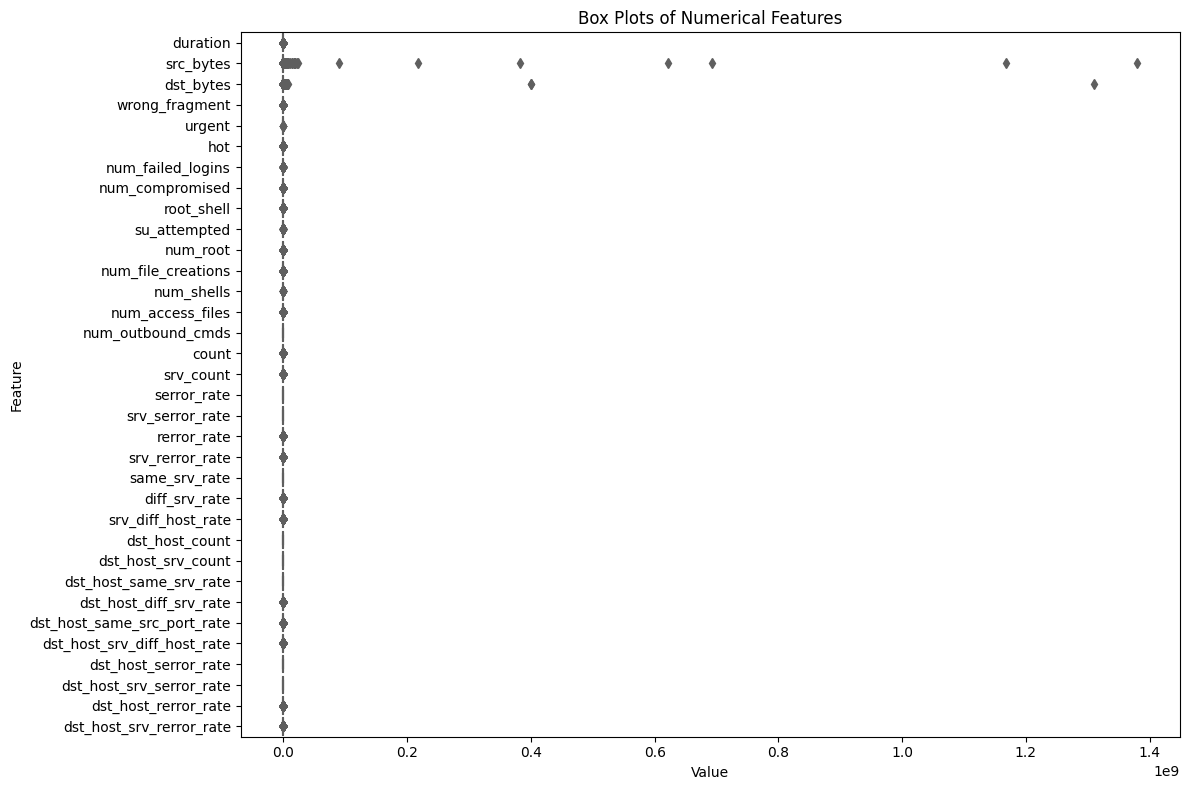

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each numerical feature
sns.boxplot(data=train[numeric_columns], orient='h', palette='Set3')

# Set the title and labels
plt.title('Box Plots of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Feature')

# Show the plot
plt.tight_layout()
plt.show()



Now, Distribution of the categorical features is shown below.

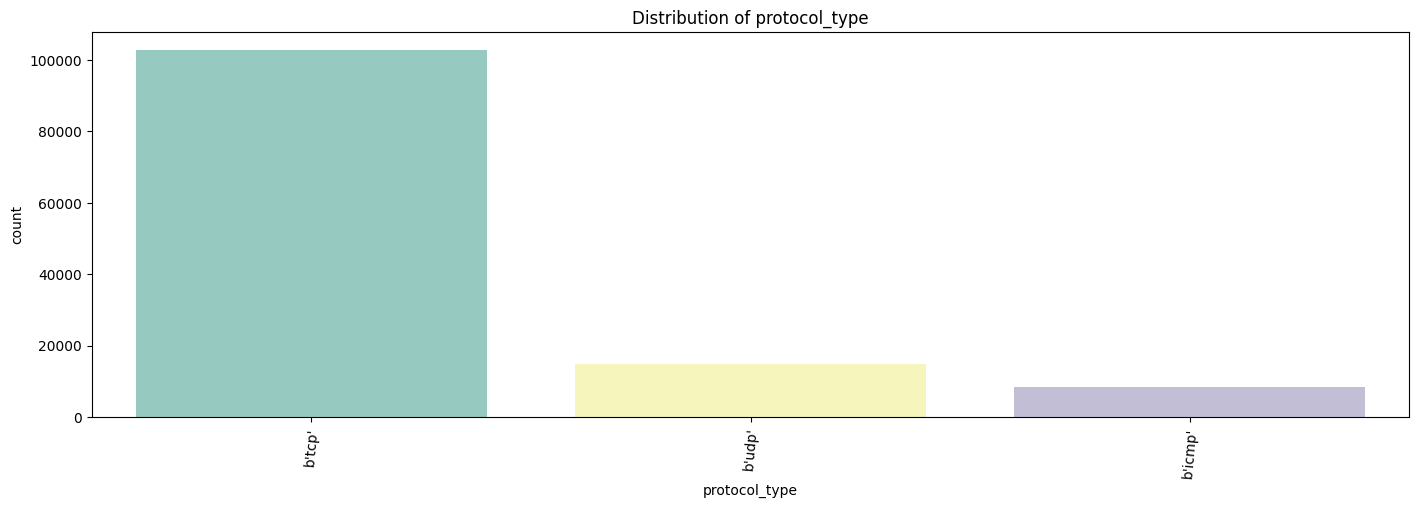

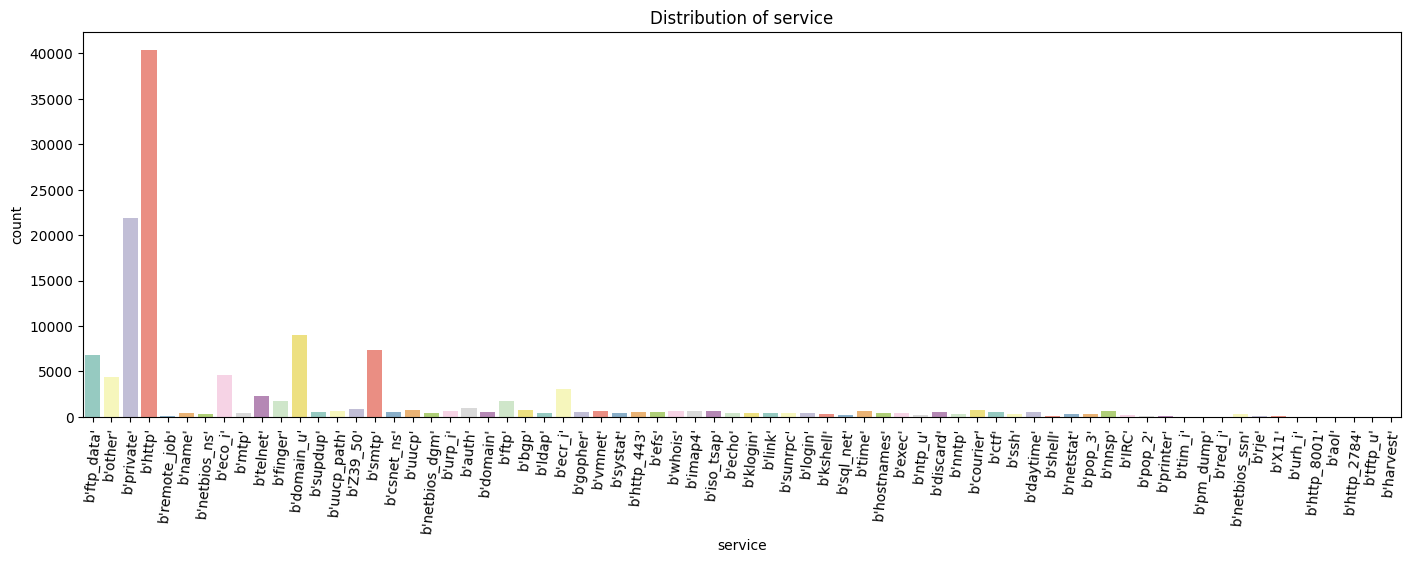

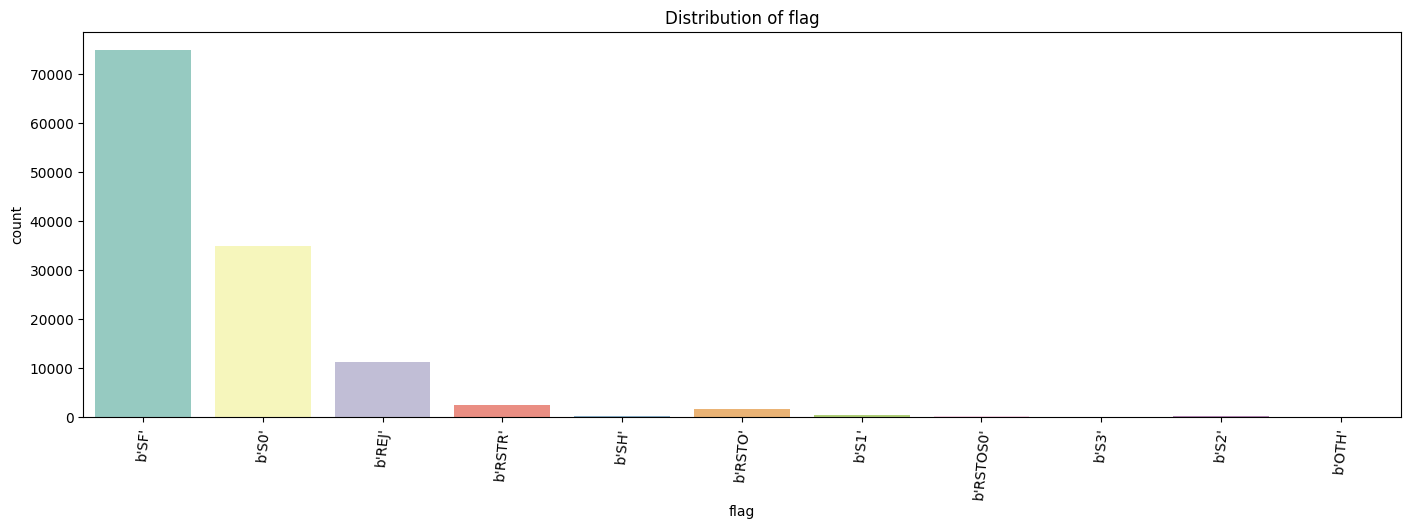

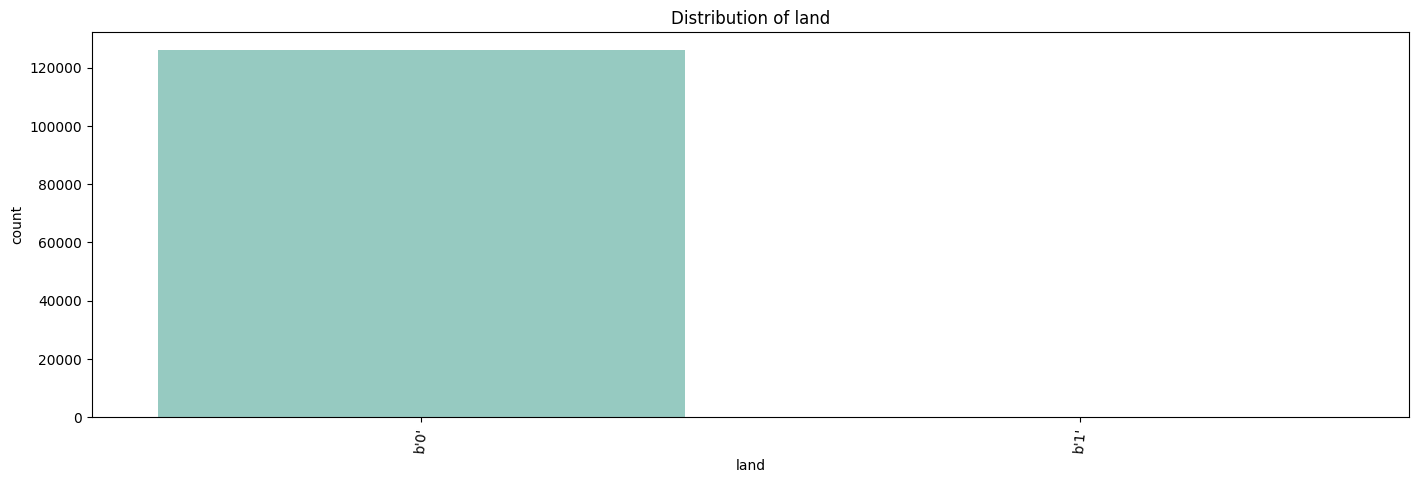

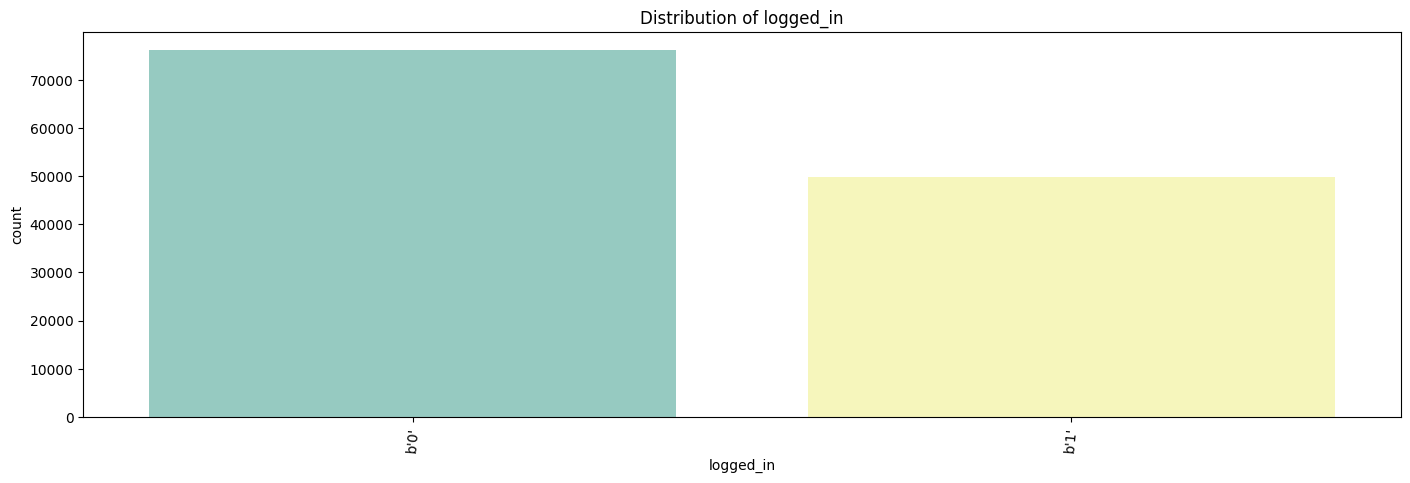

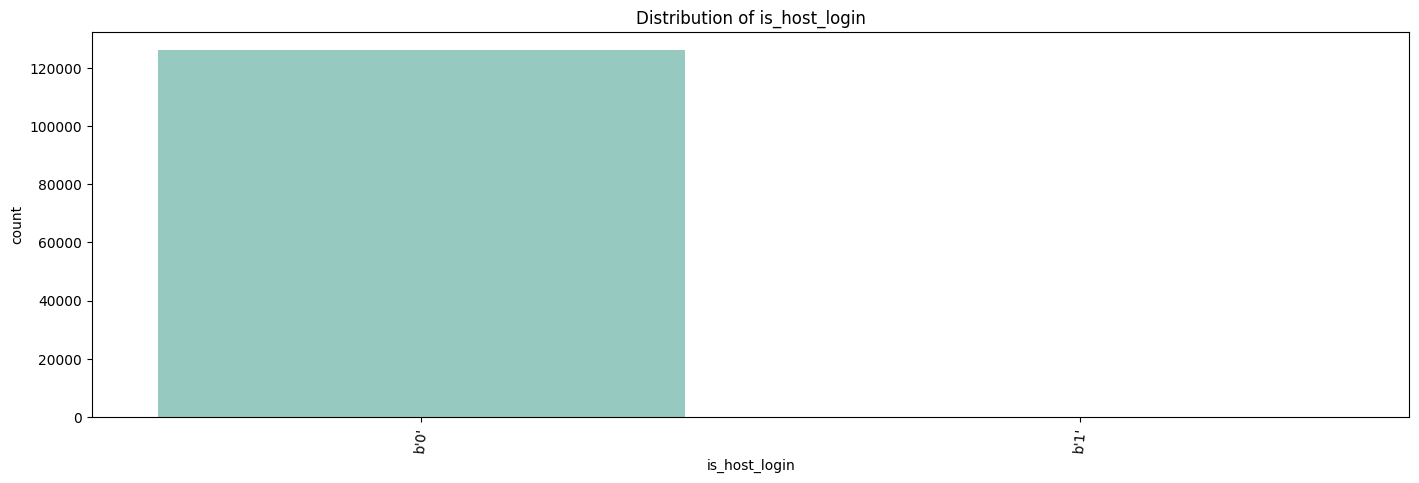

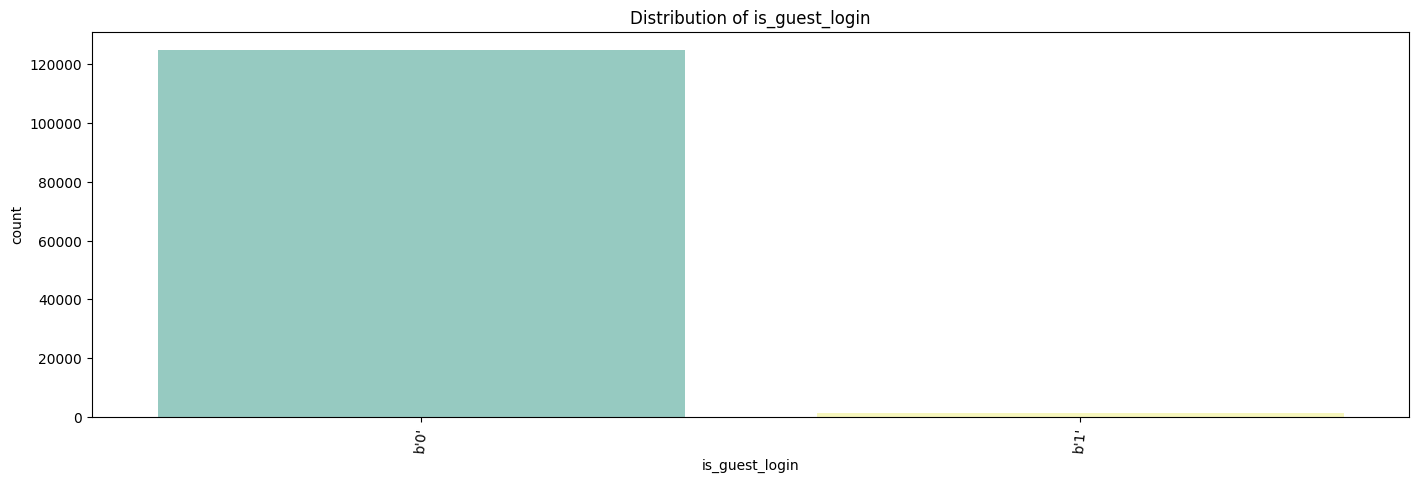

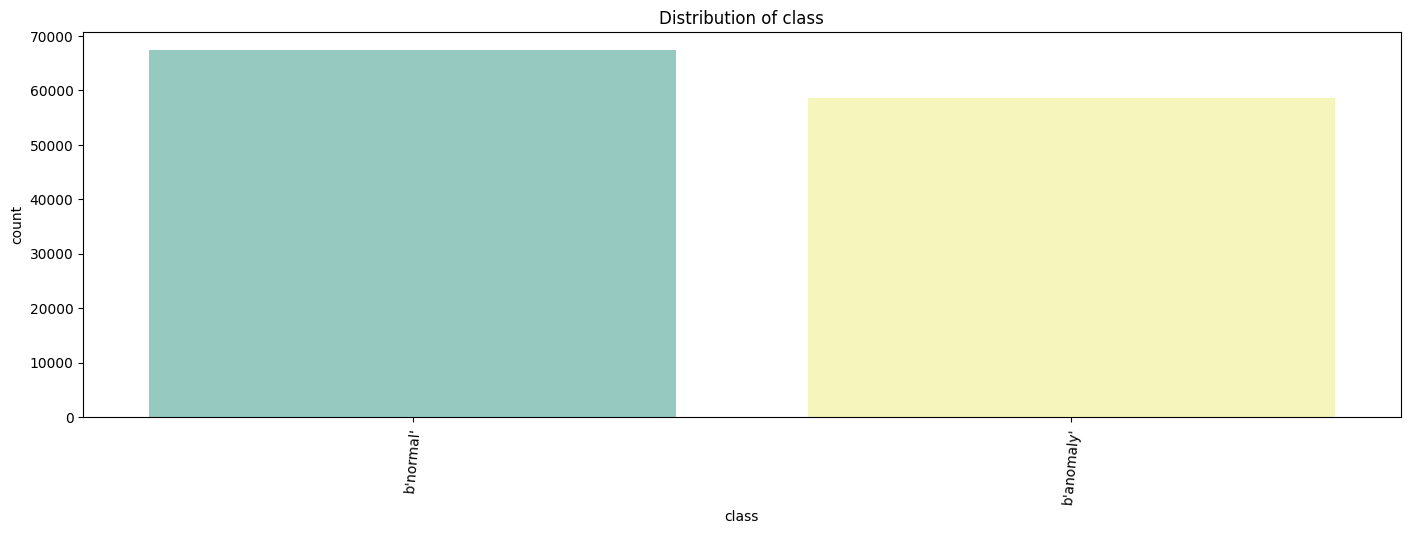

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_cols:
    plt.figure(figsize=(17, 5))
    sns.countplot(data=train, x=feature, palette='Set3')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=85)
    plt.show()

/home/mahrjose/bin/BRACU/BRACU-CSE422/Course Project - Network Intrusion Detection using Machine Learning/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_4419/2243521363.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


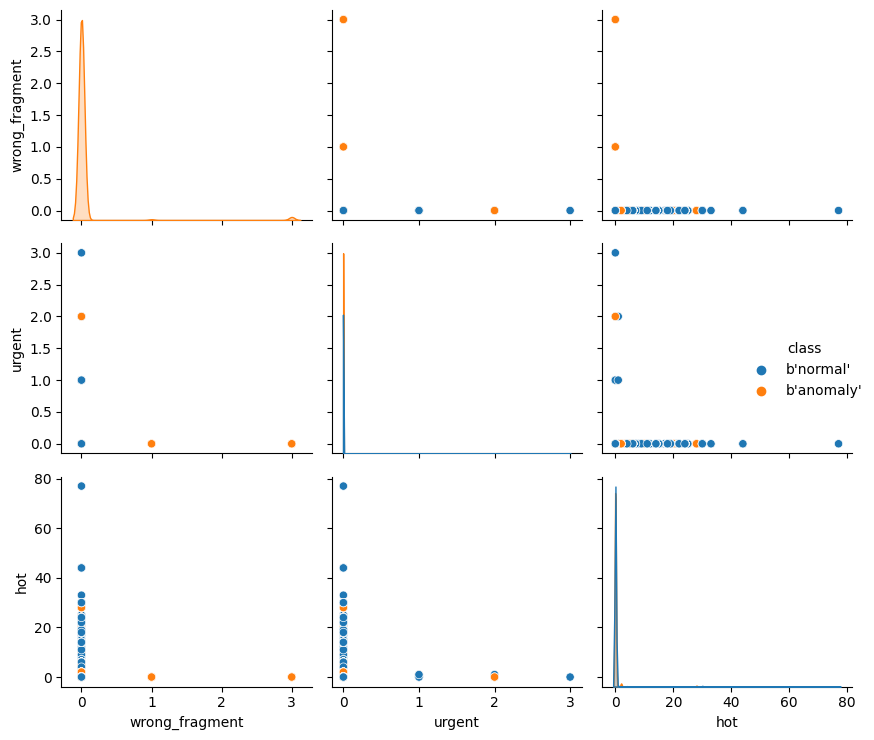

In [ ]:
# Create a pair plot with 'hue' parameter for coloring based on the 'class' column
sns.pairplot(train[["protocol_type", "service", "flag", "land", "wrong_fragment", "urgent", "hot", "class"]], hue='class', diag_kind='kde')
plt.tight_layout()
plt.show()


In [ ]:
### Imbalanced Dataset Question Part from the Template ( please read that and try to implement it here)

### Data Cleaning : Handling & Imputing Missing Values

In this stage we're ensuring there's no missing / null values in the datset. Also, we'll decide if we should drop any columns or rows based on the missing values or unnecessary columns.

In [ ]:
# Manually Checking if data include missing values
train_missingValues = train.isnull().sum()
print(f"Missing Values in every Column: \n{train_missingValues}")

Missing Values in every Column: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [ ]:
# Manually Checking if data include missing values
test_missingValues = test.isnull().sum()
print(f"Missing Values in every Column: \n{test_missingValues}")

Missing Values in every Column: 
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

Since there's no missing values in the dataset, we don't need to handle/ impute missing values.
Also, since every feature is complete with its values, we don't need to drop any feature. But, we'll check if there's any feature with unnecessary values that doesn't provide any information to our model.


In [ ]:
print('These columns have only one unique value:')
print(f"Train Dataset: {[col for col in train if train[col].nunique() == 1]}")
print(f"Test Dataset: {[col for col in test if test[col].nunique() == 1]}\n")
print("===========================================")
print(f"Shape of Train Dataset before dropping unnecessary columns: {train.shape}")
print(f"Shape of Test Dataset before dropping unnecessary columns: {test.shape}")

These columns have only one unique value:
Train Dataset: ['num_outbound_cmds']
Test Dataset: ['num_outbound_cmds']

Shape of Train Dataset before dropping unnecessary columns: (125973, 42)
Shape of Test Dataset before dropping unnecessary columns: (22544, 42)


In [ ]:
# Since 'num_outbound_cmds' has only one unique value,
# we will drop it from both train and test datasets
train = train.drop(columns='num_outbound_cmds')
test = test.drop(columns='num_outbound_cmds')

print(f"Shape of Train Dataset after dropping unnecessary columns: {train.shape}")
print(f"Shape of Test Dataset after dropping unnecessary columns: {test.shape}")

Shape of Train Dataset after dropping unnecessary columns: (125973, 41)
Shape of Test Dataset after dropping unnecessary columns: (22544, 41)


## Outliers and Removing the Outliers
Now, We'll find the outliers in the dataset and remove them if necessary.

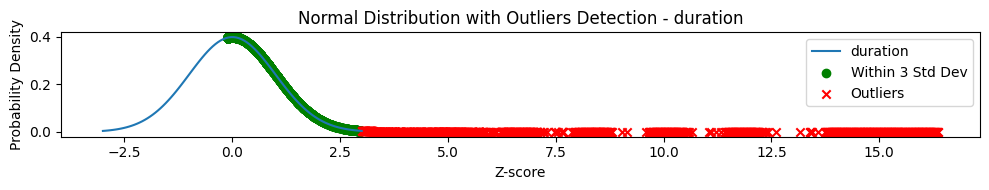

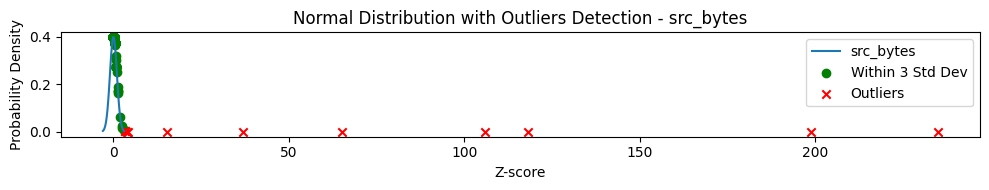

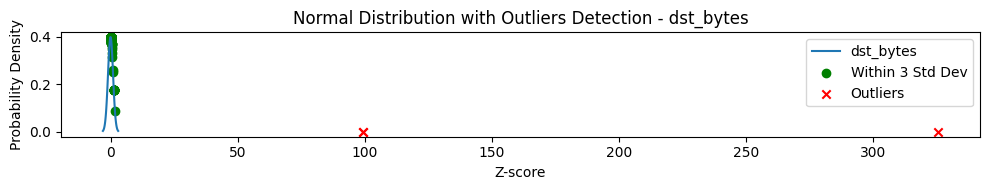

In [ ]:
from scipy.stats import zscore, norm

# selected numerical features for outlier detection
selected_features = ["duration", "src_bytes", "dst_bytes","root_shell"]

for feature in selected_features:
    plt.figure(figsize=(10, 2))

    # Calculate Z-scores, mean and std deviation for the feature
    z_scores = zscore(train[feature])
    mean = np.mean(train[feature])
    std_dev = np.std(train[feature])

    # Creating a range of values for the x-axis (z-scores)
    x = np.linspace(-3, 3, 100)

    # Calculating the corresponding probability density for each x value by
    # Using standard normal distribution with mean 0 and std dev 1
    y = norm.pdf(x, 0, 1)

    # Plotting the normal distribution curve
    sns.lineplot(x=x, y=y, label=feature)

    # Mark values inside 3-standard deviation range in green
    plt.scatter(z_scores[(z_scores >= -3) & (z_scores <= 3)],
                norm.pdf(z_scores[(z_scores >= -3) & (z_scores <= 3)], 0, 1),
                color='green', marker='o', label='Within 3 Std Dev')

    # Mark outliers in red
    plt.scatter(z_scores[(z_scores < -3) | (z_scores > 3)],
                norm.pdf(z_scores[(z_scores < -3) | (z_scores > 3)], 0, 1),
                color='red', marker='x', label='Outliers')

    plt.title(f'Normal Distribution with Outliers Detection - {feature}')
    plt.xlabel('Z-score')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


Now, as there is outliers in our dataset, we will remove them. We will use the Z-score method to detect and remove the outliers. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [ ]:
from scipy.stats import zscore

# A threshold value beyond which a data point is considered as an outlier
zscore_threshold = 3

# Calculate Z-scores for numeric columns (excluding categorical) in the training dataset
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
z_scores_train = np.abs(zscore(train[numeric_columns]))

# Create an outlier mask indicating whether each row in the training dataset is an outlier or not
outlier_mask_train = np.any(z_scores_train > zscore_threshold, axis=1)

# Remove outliers from the training dataset
train_original = train.copy()
train = train_original[~outlier_mask_train]

# Calculate Z-scores for numeric columns (excluding categorical) in the test dataset
z_scores_test = np.abs(zscore(test[numeric_columns]))

# Create an outlier mask indicating whether each row in the test dataset is an outlier or not
outlier_mask_test = np.any(z_scores_test > zscore_threshold, axis=1)

# Remove outliers from the test dataset
test_original = test.copy()
test = test_original[~outlier_mask_test]

# Display the shape before and after removing outliers for both datasets
print("Training Dataset Shape before removing outliers:", train_original.shape)
print("Training Dataset Shape after removing outliers:", train.shape)
print("===========================================")
print("Test Dataset Shape before removing outliers:", test_original.shape)
print("Test Dataset Shape after removing outliers:", test.shape)


Training Dataset Shape before removing outliers: (125973, 41)
Training Dataset Shape after removing outliers: (103446, 41)
Test Dataset Shape before removing outliers: (22544, 41)
Test Dataset Shape after removing outliers: (15734, 41)


### Feature  Scalling & Encoding

After removing the outliers, We'll scale the numerical features and encode the categorical features. We'll use the MinMaxScaler to scale the numerical features and OneHotEncoder to encode the categorical features.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

train_categorical = train[train.select_dtypes(include=['object']).columns]
test_categorical = test[test.select_dtypes(include=['object']).columns]

train_categorical = train_categorical.drop(columns='class')
test_categorical = test_categorical.drop(columns='class')

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_categorical)

train_encoded = encoder.transform(train_categorical)
test_encoded = encoder.transform(test_categorical)

print(f"Shape of Train Dataset before encoding: {train.shape}")
print(f"Shape of Test Dataset before encoding: {test.shape}")
print("===========================================")
print(f"Shape of Train Dataset after encoding: {train_encoded.shape}")
print(f"Shape of Test Dataset after encoding: {test_encoded.shape}")

Shape of Train Dataset before encoding: (103446, 41)
Shape of Test Dataset before encoding: (15734, 41)
Shape of Train Dataset after encoding: (103446, 87)
Shape of Test Dataset after encoding: (15734, 87)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_numerical = train[train.select_dtypes(include=['float64']).columns]
test_numerical = test[test.select_dtypes(include=['float64']).columns]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_numerical)
test_scaled = scaler.transform(test_numerical)

# scaler = StandardScaler()
# train_scaled = scaler.fit_transform(train_numerical)
# test_scaled = scaler.transform(test_numerical)

print(f"Shape of Train Dataset after Scaling: {train_scaled.shape}")
print(f"Shape of Test Dataset after Sclaing: {test_scaled.shape}")

Shape of Train Dataset after Scaling: (103446, 33)
Shape of Test Dataset after Sclaing: (15734, 33)


In [ ]:

# Convert scaled arrays back to DataFrames with original column names
train_scaled = pd.DataFrame(train_scaled, columns=train_numerical.columns)
test_scaled = pd.DataFrame(test_scaled, columns=test_numerical.columns)

# Get the feature names for the encoded columns
encoded_columns = encoder.get_feature_names_out(input_features=train_categorical.columns)
train_encoded = pd.DataFrame(train_encoded.toarray(), columns=encoded_columns)
test_encoded = pd.DataFrame(test_encoded.toarray(), columns=encoded_columns)

# Concatenate the scaled and encoded DataFrames
train_processed = pd.concat([train_scaled, train_encoded], axis=1)
test_processed = pd.concat([test_scaled, test_encoded], axis=1)


print(f"Total Shape of Train Dataset after Sclaing & Encoding: {train_processed.shape}")
print(f"Total Shape of Test Dataset after Scaling & Encoding: {test_processed.shape}")

Total Shape of Train Dataset after Sclaing & Encoding: (103446, 120)
Total Shape of Test Dataset after Scaling & Encoding: (15734, 120)


### Correletion Analysis
We'll use the Pearson Correlation method to find the correlation between the features. We'll remove the features which are highly correlated with each other. We'll try to keep the features which are less correlated with each other.

Initial number of features in train dataset: 120
Initial number of features in test dataset: 120


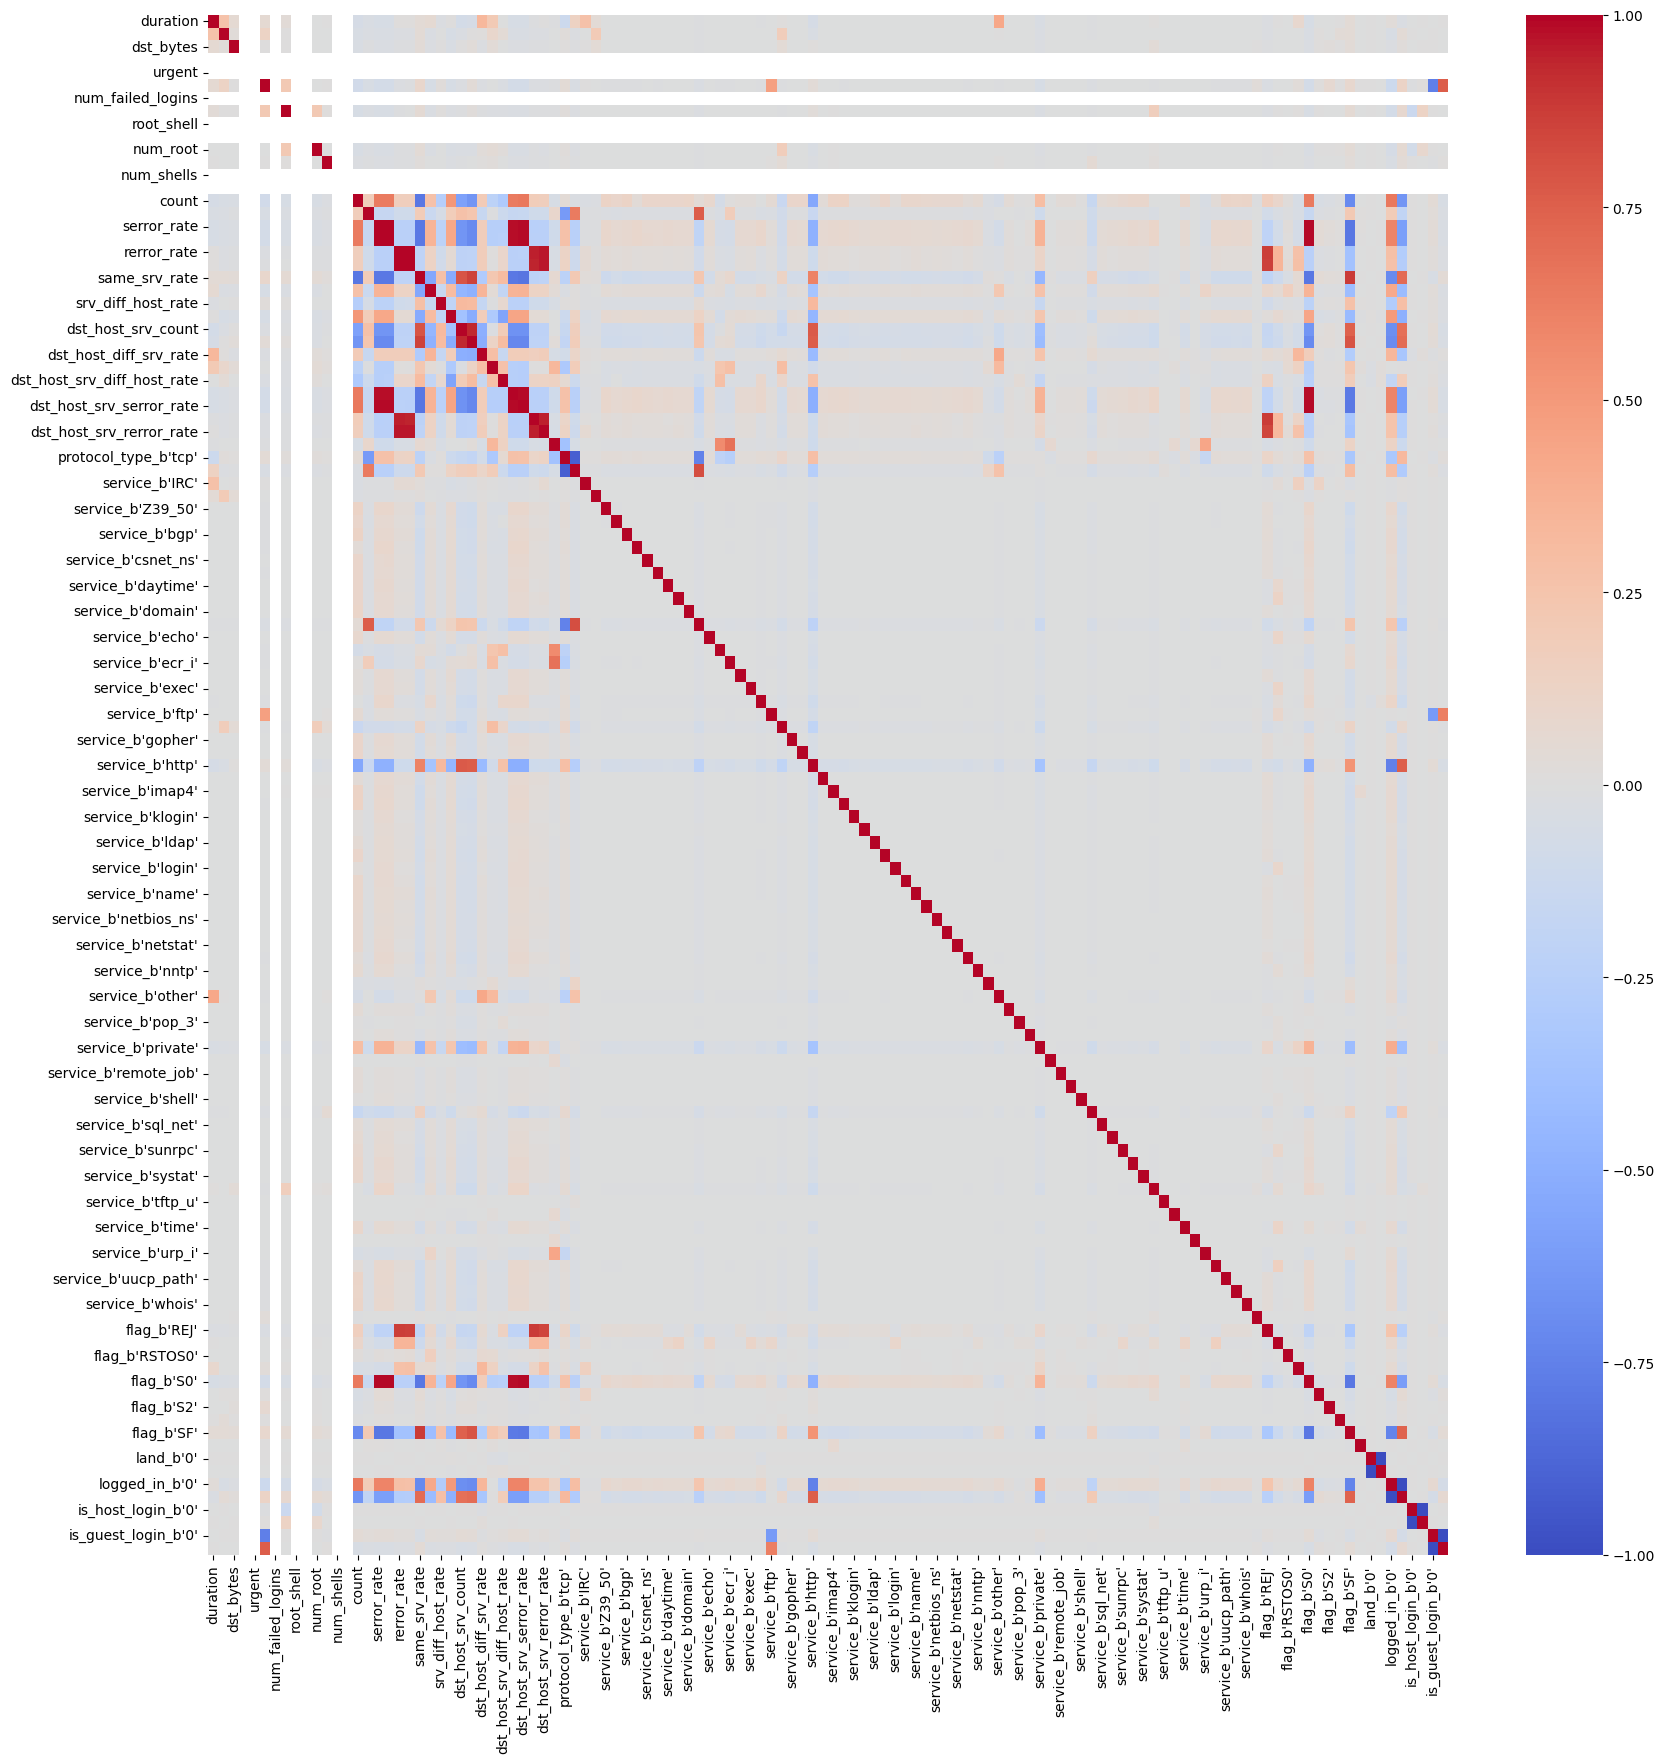

In [ ]:
# Calculate the correlation matrix for train dataset
corr_matrix_train = train_processed.corr(method='pearson')

print("Initial number of features in train dataset:", len(corr_matrix_train.columns))

# Calculate the correlation matrix for test dataset
corr_matrix_test = test_processed.corr(method='pearson')

print("Initial number of features in test dataset:", len(corr_matrix_test.columns))

plt.figure(figsize=(20, 20))

# Create the heatmap with modified parameters
sns.heatmap(train_processed.corr(method='pearson'),
            fmt='.1g',
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm',
            linewidths=0,
            linecolor='black')

plt.show()

### Feature Reduction
Now, We'll remove some features that are not useful for our model. We'll remove the features which are highly correlated with each other. We'll try to keep the features which are highly correlated with the target variable.

In [ ]:

# Define the correlation threshold
corr_threshold = 0.65

# Find highly correlated features for train dataset
high_corr_features_train = set()

# Iterate through upper triangle of the correlation matrix for train dataset
for i in range(len(corr_matrix_train.columns)):
    for j in range(i + 1, len(corr_matrix_train.columns)):
        if abs(corr_matrix_train.iloc[i, j]) > corr_threshold:
            high_corr_features_train.add(corr_matrix_train.columns[j])


print("Number of features with high correlation in train dataset:", len(high_corr_features_train))
print('Number of highly correlated features in test dataset:', len(high_corr_features_train))
print("===========================================")

# Drop highly correlated features from both train and test datasets
train_processed = train_processed.drop(columns=high_corr_features_train)
test_processed = test_processed.drop(columns=high_corr_features_train)

print("Number of remaining features in train dataset:", len(train_processed.columns))
print("Number of remaining features in test dataset:", len(test_processed.columns))
print("===========================================")
print("Shape of Train Dataset after removing highly correlated features:", train_processed.shape)
print("Shape of Test Dataset after removing highly correlated features:", test_processed.shape)

Number of features with high correlation in train dataset: 22
Number of highly correlated features in test dataset: 22
Number of remaining features in train dataset: 98
Number of remaining features in test dataset: 98
Shape of Train Dataset after removing highly correlated features: (103446, 98)
Shape of Test Dataset after removing highly correlated features: (15734, 98)


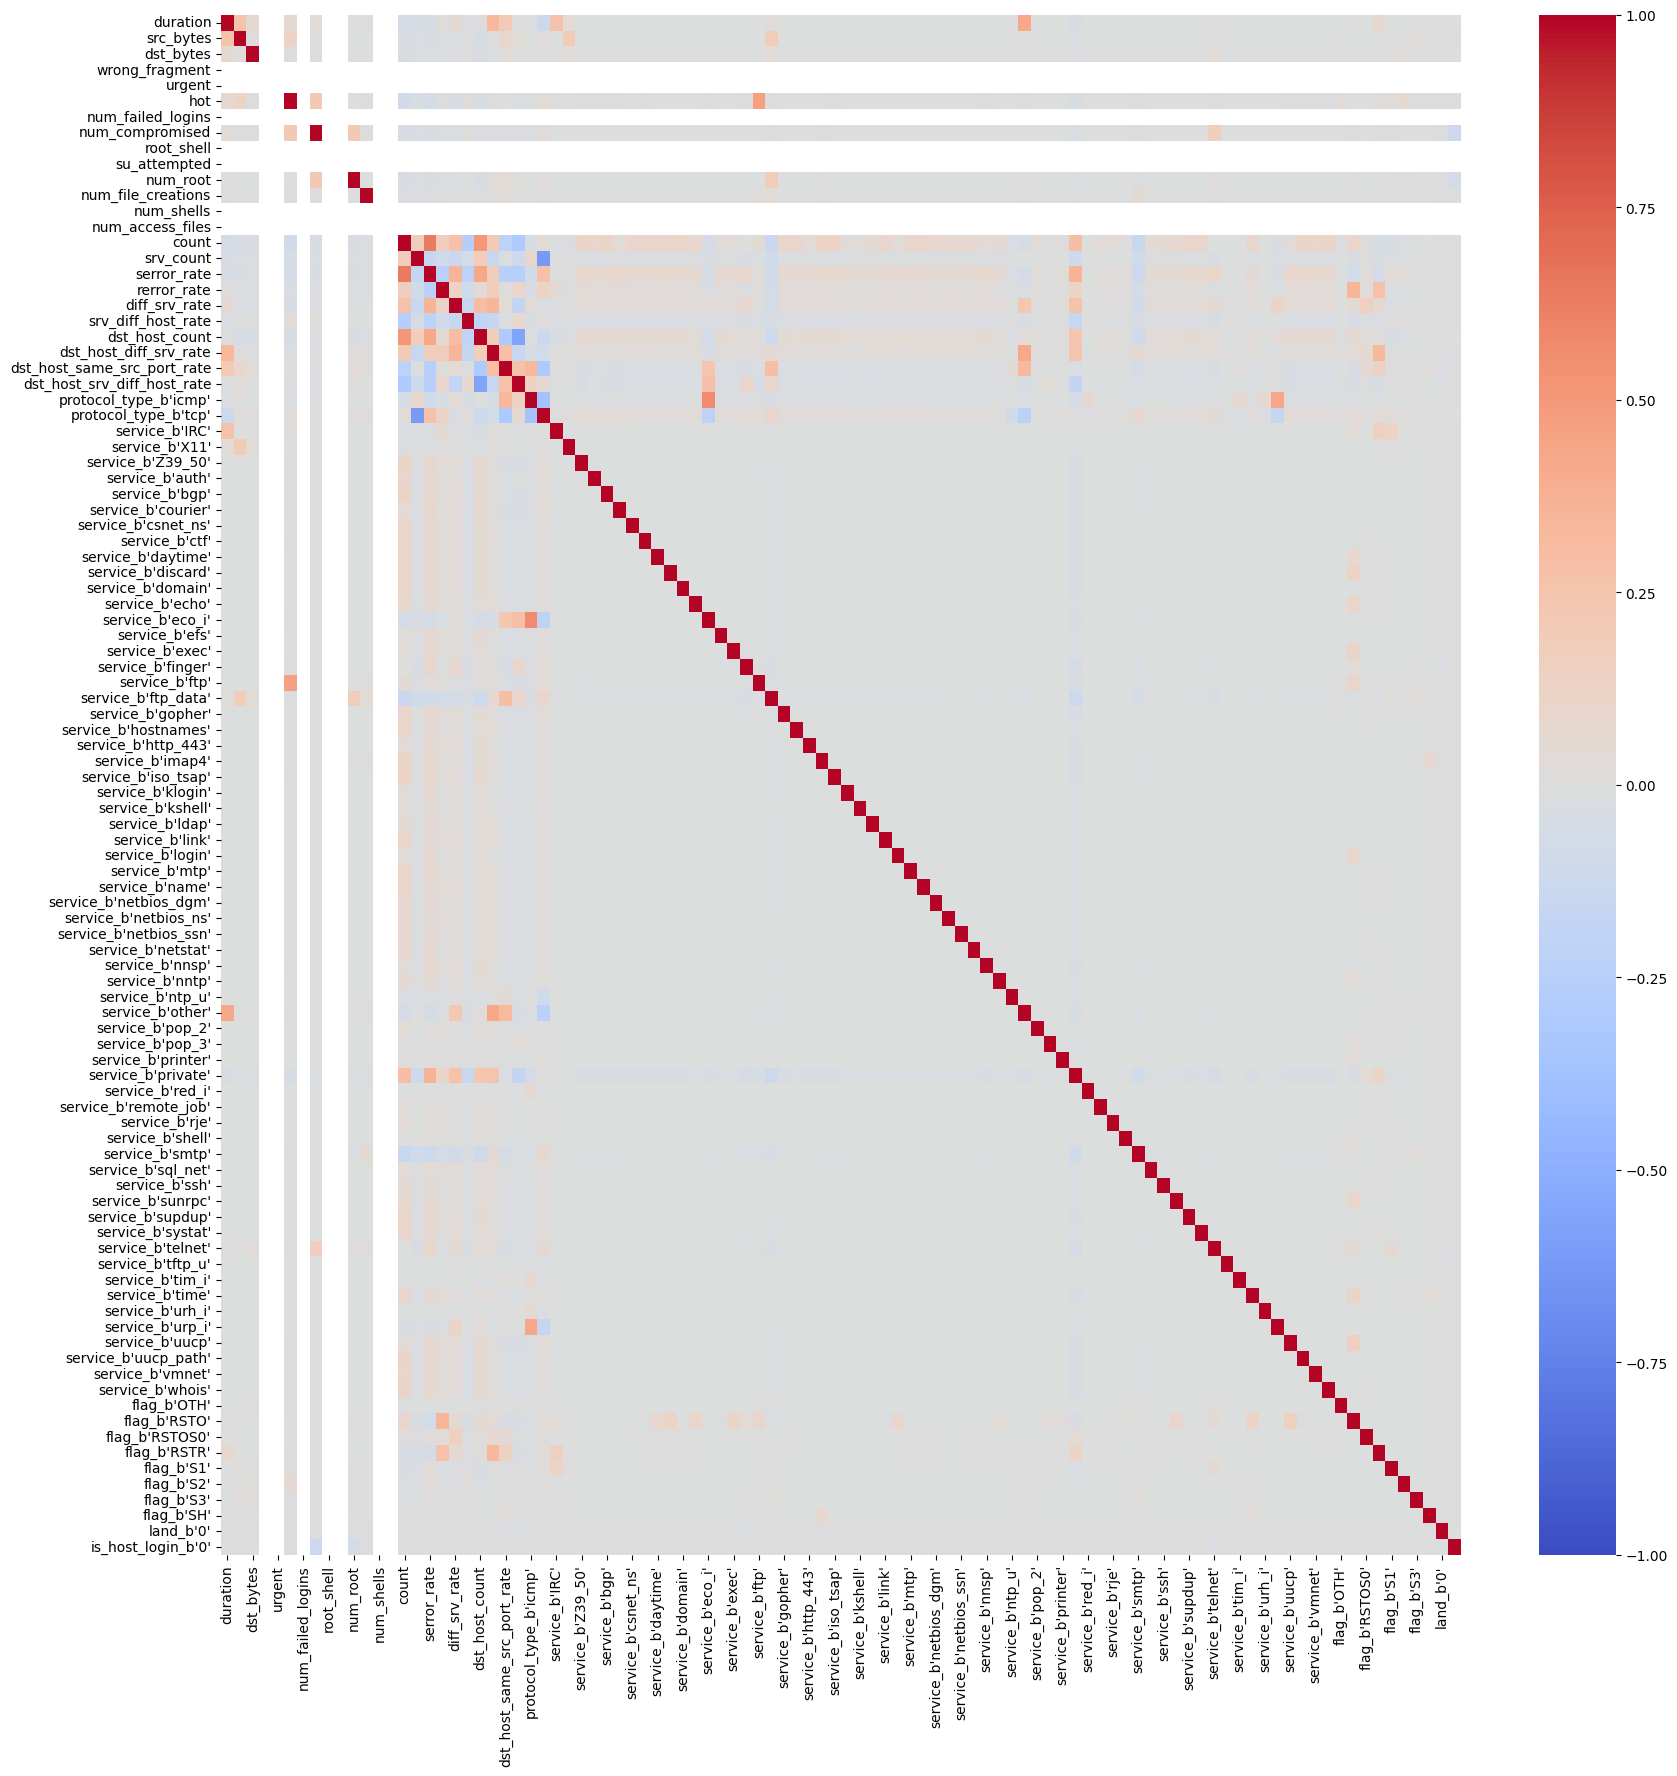

In [ ]:


plt.figure(figsize=(20, 20))

# Create the heatmap with modified parameters
sns.heatmap(train_processed.corr(method='pearson'),
            fmt='.1g',
            vmin=-1, vmax=1,
            center=0,
            cmap='coolwarm',
            linewidths=0,
            linecolor='black')

plt.show()


### Exporting Preprocessed Dataset
Now, we'll export the preprocessed dataset to a csv file. We can this dataset for training our ML models.

In [ ]:
## Exporting the processed data to CSV files

# import os

# output_directory = './data/processed/'

# # Check if the output directory exists, create it if not
# if not os.path.exists(output_directory):
#     os.makedirs(output_directory)

# # Export dataframes to CSV files in the output directory
# train_processed.to_csv(os.path.join(output_directory, 'train_processed.csv'), index=False)
# test_processed.to_csv(os.path.join(output_directory, 'test_processed.csv'), index=False)

# print("Train processed data exported to './data/processed/train_processed.csv'")
# print("Test processed data exported to './data/processed/test_processed.csv'")


In [ ]:
# Load the data back up (This way we can start from here without running the whole notebook)
# train_processed = pd.read_csv('./data/processed/train_processed.csv')
# test_processed = pd.read_csv('./data/processed/test_processed.csv')

### Data Splitting for Training and Testing
Now, we'll create x_train, x_test, y_train, y_test datasets from our train and test datsets.

In [ ]:

from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets (70-30 split)
# X_train, X_test, y_train, y_test = train_test_split(train_processed, train['class'], test_size=0.3, random_state=42)


# Train with the Trainning Data and Testing with testing data
X_train = train_processed.to_numpy()
y_train = train['class']

X_test = test_processed.to_numpy()
y_test = test['class']

print(f'Shape of X_train (Train Dataset without Class): {X_train.shape}')
print(f'Shape of y_train (Train Dataset with Class): {y_train.shape}')
print("===========================================")
print(f'Shape of X_test (Test Dataset without Class): {X_test.shape}')
print(f'Shape of y_test (Test Dataset with Class): {y_test.shape}')

Shape of X_train (Train Dataset without Class): (103446, 98)
Shape of y_train (Train Dataset with Class): (103446,)
Shape of X_test (Test Dataset without Class): (15734, 98)
Shape of y_test (Test Dataset with Class): (15734,)


## Training the Model
We will use the following algorithms to train our model:
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)


### K-Nearest Neighbors

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize list to store model accuracy
model_accuracy_list = []

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= K-Nearest Neighbors Classifier - Test Data =================")
print(f"Accuracy of K-Nearest Neighbors Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


================= K-Nearest Neighbors Classifier - Test Data =================
Accuracy of K-Nearest Neighbors Classifier on Test Data: 79.55%

Confusion Matrix on Test Data:
[[4237 3056]
 [ 162 8279]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      7293
           1       0.73      0.98      0.84      8441

    accuracy                           0.80     15734
   macro avg       0.85      0.78      0.78     15734
weighted avg       0.84      0.80      0.79     15734



### Naive Bayes

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Gaussian Naive Bayes Classifier - Test Data =================")
print(f"Accuracy of Gaussian Naive Bayes Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


================= Gaussian Naive Bayes Classifier - Test Data =================
Accuracy of Gaussian Naive Bayes Classifier on Test Data: 63.16%

Confusion Matrix on Test Data:
[[1529 5764]
 [  33 8408]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.21      0.35      7293
           1       0.59      1.00      0.74      8441

    accuracy                           0.63     15734
   macro avg       0.79      0.60      0.54     15734
weighted avg       0.77      0.63      0.56     15734



### Decision Tree

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Decision Tree Classifier - Test Data =================")
print(f"Accuracy of Decision Tree Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


================= Decision Tree Classifier - Test Data =================
Accuracy of Decision Tree Classifier on Test Data: 84.35%

Confusion Matrix on Test Data:
[[4988 2305]
 [ 158 8283]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      7293
           1       0.78      0.98      0.87      8441

    accuracy                           0.84     15734
   macro avg       0.88      0.83      0.84     15734
weighted avg       0.87      0.84      0.84     15734



### Logistic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Logistic Regression Classifier - Test Data =================")
print(f"Accuracy of Logistic Regression Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


================= Logistic Regression Classifier - Test Data =================
Accuracy of Logistic Regression Classifier on Test Data: 80.29%

Confusion Matrix on Test Data:
[[4412 2881]
 [ 220 8221]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      0.60      0.74      7293
           1       0.74      0.97      0.84      8441

    accuracy                           0.80     15734
   macro avg       0.85      0.79      0.79     15734
weighted avg       0.84      0.80      0.79     15734



/home/mahrjose/bin/BRACU/BRACU-CSE422/Course Project - Network Intrusion Detection using Machine Learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Random Forest Classifier - Test Data =================")
print(f"Accuracy of Random Forest Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)


================= Random Forest Classifier - Test Data =================
Accuracy of Random Forest Classifier on Test Data: 80.15%

Confusion Matrix on Test Data:
[[4311 2982]
 [ 141 8300]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      7293
           1       0.74      0.98      0.84      8441

    accuracy                           0.80     15734
   macro avg       0.85      0.79      0.79     15734
weighted avg       0.84      0.80      0.79     15734



### Support Vector Machine (SVM)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_encoded = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
model_accuracy_list.append(accuracy)


# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

# Print pretty output
print("================= Support Vector Machine Classifier - Test Data =================")
print(f"Accuracy of Support Vector Machine Classifier on Test Data: {accuracy*100:.2f}%\n")
print("Confusion Matrix on Test Data:")
print(conf_matrix)
print("\nClassification Report on Test Data:")
print(class_report)

================= Support Vector Machine Classifier - Test Data =================
Accuracy of Support Vector Machine Classifier on Test Data: 79.49%

Confusion Matrix on Test Data:
[[4209 3084]
 [ 143 8298]]

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.58      0.72      7293
           1       0.73      0.98      0.84      8441

    accuracy                           0.79     15734
   macro avg       0.85      0.78      0.78     15734
weighted avg       0.84      0.79      0.78     15734



### Comparison of the Models

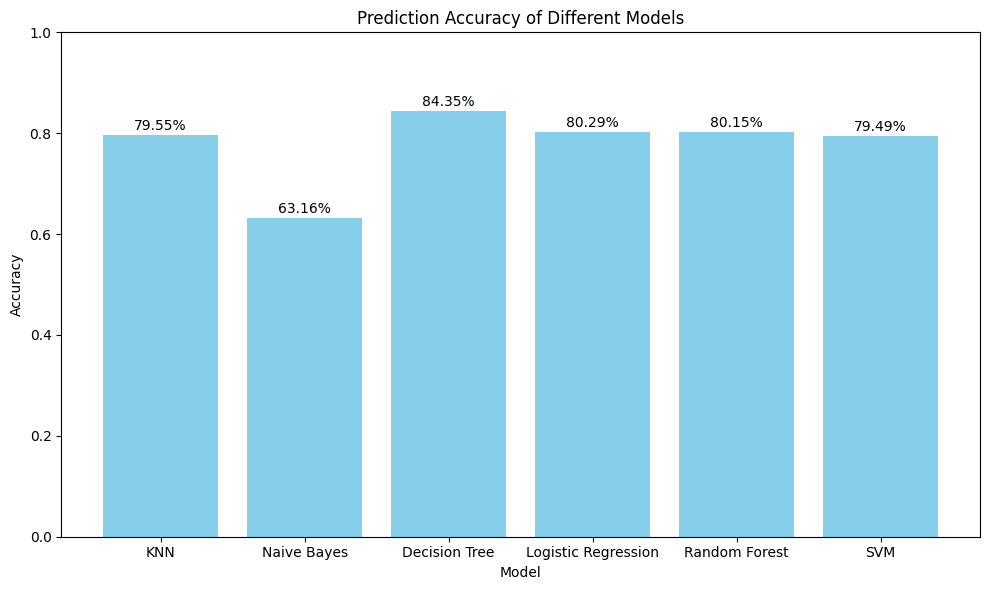

In [ ]:
import matplotlib.pyplot as plt

# List of model names
if len(model_accuracy_list) == 6:
    model_names = ["KNN", "Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest", "SVM"]
else:
    model_names = ["KNN", "Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracy_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=0)

# Add the accuracy values on top of the bars
for i, acc in enumerate(model_accuracy_list):
    plt.text(i, acc + 0.01, f"{acc*100:.2f}%", ha='center', fontsize=10)

# Adjusting the top margin to move the "Model" label down
plt.subplots_adjust(top=0.85)

plt.tight_layout()
plt.show()
